In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
def get_data():
  df = pd.read_csv('ecommerce_data.csv')
  # easier to work with numpy array
  data = df.values
  # shuffle it
  np.random.shuffle(data)

  # split features and labels
  X = data[:,:-1]
  Y = data[:,-1].astype(np.int32)

  # one-hot encode the categorical data
  # create a new matrix X2 with the correct number of columns
  N, D = X.shape
  X2 = np.zeros((N, D+3))
  X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

  # one-hot
  for n in range(N):
      t = int(X[n,D-1])
      X2[n,t+D-1] = 1

  # assign X2 back to X, since we don't need original anymore
  X = X2

  # split train and test
  Xtrain = X[:-100]
  Ytrain = Y[:-100]
  Xtest = X[-100:]
  Ytest = Y[-100:]

  # normalize columns 1 and 2
  for i in (1, 2):
    m = Xtrain[:,i].mean()
    s = Xtrain[:,i].std()
    Xtrain[:,i] = (Xtrain[:,i] - m) / s
    Xtest[:,i] = (Xtest[:,i] - m) / s

  return Xtrain, Ytrain, Xtest, Ytest


def get_binary_data():
  # return only the data from the first 2 classes
  Xtrain, Ytrain, Xtest, Ytest = get_data()
  X2train = Xtrain[Ytrain <= 1]
  Y2train = Ytrain[Ytrain <= 1]
  X2test = Xtest[Ytest <= 1]
  Y2test = Ytest[Ytest <= 1]
  return X2train, Y2train, X2test, Y2test

In [13]:
X_train, Y_train, X_test, Y_test = get_binary_data()

In [14]:
D = X_train.shape[1]
w = np.random.randn(D)
b = 0 # bias term

# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

P_Y_given_X = forward(X_train, w, b)
predictions = np.round(P_Y_given_X)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

print("Score:", classification_rate(Y_train, predictions))

Score: 0.4037854889589905


Not that good, but this means that we need a way to find the correct values of $w_i$

In [15]:
#First we define the error function that will be minimized
def cross_entropy(T, y_pred):
    return -np.mean((T*np.log(y_pred)) + (1-T)*np.log(1-y_pred))
#The two list bellow are to graph at the end
train_costs = []
tests_costs = []

In [16]:
learning_rate = 0.002
for i in range(10000):
    pred_Y_train = forward(X_train, w, b)
    pred_Y_test = forward(X_test, w, b)
    
    ctrain = cross_entropy(Y_train, pred_Y_train)
    ctest = cross_entropy(Y_test, pred_Y_test)
    train_costs.append(ctrain)
    tests_costs.append(ctest)

    #Let's make gradient descent
    w -= learning_rate * X_train.T.dot(pred_Y_train - Y_train)
    b -= learning_rate *(pred_Y_train-Y_train).sum()
    if i %1000 == 0:
        print(i,ctrain,ctest)

0 0.8560312897109597 0.8769794662329559
1000 0.1697066545402953 0.23522487702628225
2000 0.16955997484473584 0.2359171713459437
3000 0.16955796294620196 0.23602191126436153
4000 0.1695579319544615 0.23603525244786042
5000 0.16955793147049336 0.23603692490365943
6000 0.16955793146292367 0.23603713416049865
7000 0.16955793146280504 0.23603716033634567
8000 0.16955793146280337 0.2360371636105708
9000 0.16955793146280315 0.2360371640201285


Final train classification rate: 0.9747634069400631
Final test classification rate: 0.9753086419753086


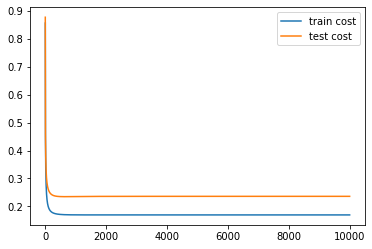

In [17]:
print(f"Final train classification rate: {classification_rate(Y_train, np.round(pred_Y_train))}")
print(f"Final test classification rate: {classification_rate(Y_test, np.round(pred_Y_test))}")
plt.plot(train_costs, label='train cost')
plt.plot(tests_costs, label='test cost')
plt.legend()
plt.show()
